In [1]:
import math
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("deliveries.csv")
pd.set_option('display.max_columns', None)
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(17380, 22)

In [4]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [5]:
df.dtypes

match_id                    int64
season                     object
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

In [6]:
df.describe()

,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed
count,17380.000000,17380.000000,17380.000000,17380.000000,17380.000000,431.000000,42.0,26.000000,117.000000,1.0,0.0,0.0
mean,16.418815,1.453797,22.544108,0.895224,0.044649,1.225058,1.0,2.153846,1.239316,5.0,NaN,NaN
std,9.196759,0.497875,13.638454,1.392734,0.285378,0.864237,0.0,1.433661,0.738703,NaN,NaN,NaN
min,1.000000,1.000000,0.100000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
25%,8.000000,1.000000,10.600000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
50%,17.000000,1.000000,22.100000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
75%,24.000000,2.000000,33.500000,1.000000,0.000000,1.000000,1.0,4.000000,1.000000,5.0,NaN,NaN
max,32.000000,2.000000,49.700000,6.000000,5.000000,5.000000,1.0,4.000000,4.000000,5.0,NaN,NaN


In [7]:
numerical_columns = ['match_id','ball']

numerical_columns

['match_id', 'ball']

In [8]:
categorical_columns = []

for col in df.columns:
    if col not in numerical_columns:
        categorical_columns.append(col)

categorical_columns

['season',
 'start_date',
 'venue',
 'innings',
 'batting_team',
 'bowling_team',
 'striker',
 'non_striker',
 'bowler',
 'runs_off_bat',
 'extras',
 'wides',
 'noballs',
 'byes',
 'legbyes',
 'penalty',
 'wicket_type',
 'player_dismissed',
 'other_wicket_type',
 'other_player_dismissed']

In [9]:
for col in categorical_columns:
    print(f'{col}: {len(df[col].unique())}')

season: 1
start_date: 28
venue: 10
innings: 2
batting_team: 10
bowling_team: 10
striker: 141
non_striker: 140
bowler: 92
runs_off_bat: 7
extras: 6
wides: 5
noballs: 2
byes: 5
legbyes: 4
penalty: 2
wicket_type: 8
player_dismissed: 136
other_wicket_type: 1
other_player_dismissed: 1


In [10]:
df['runs_off_bat'].unique()

array([0, 6, 1, 4, 2, 3, 5], dtype=int64)

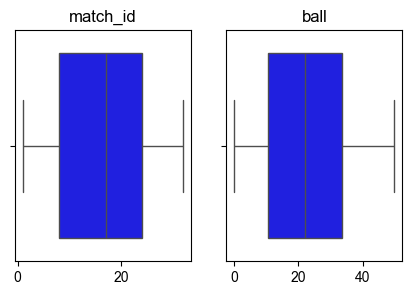

In [11]:
fig, ax=plt.subplots(1,2,figsize=(5,3))
sns.set_theme(style="whitegrid")
for axid, col in enumerate(numerical_columns):
    
    sns.boxplot(x=df[col],ax = ax[axid],color='blue')
    ax[axid].set_title(col)
    ax[axid].set_xlabel('')

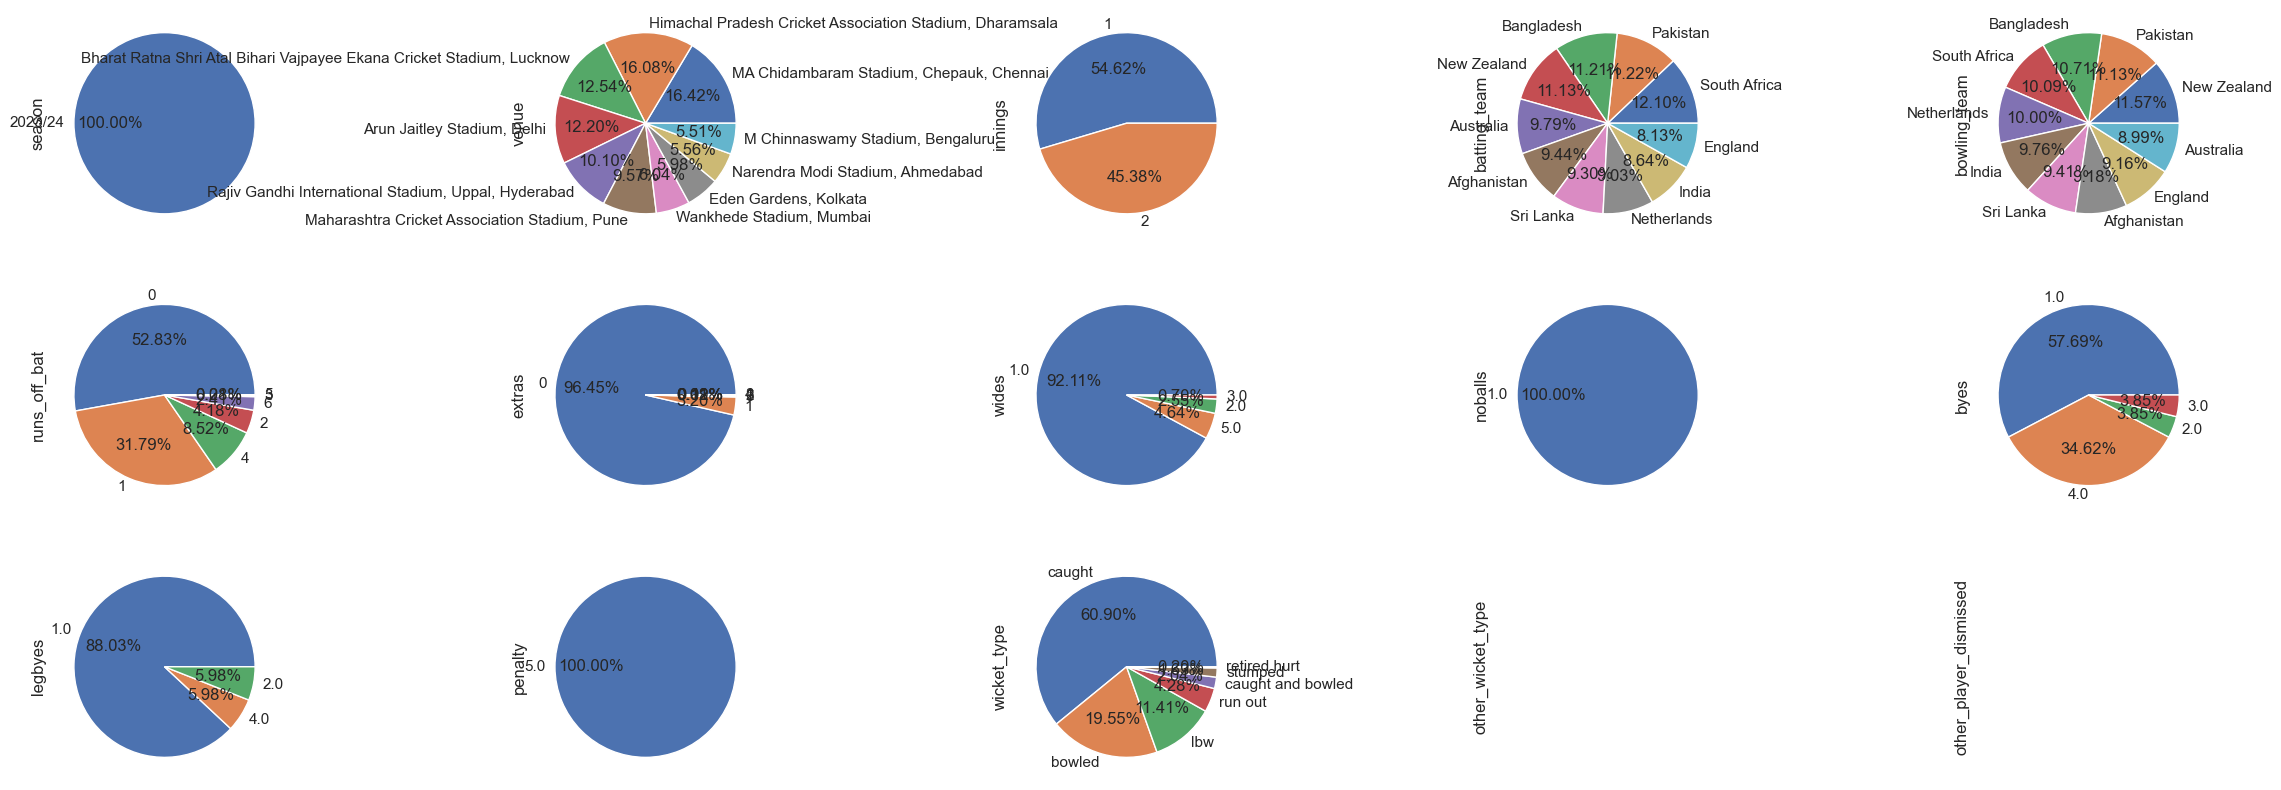

In [12]:
list = ['start_date','striker','non_striker','bowler','player_dismissed']

pie_columns=[]
for x in categorical_columns:
    if x not in list:
         pie_columns.append(x)

fig, ax = plt.subplots(3, 5, figsize=(30, 10))
count=0

for axid, col in enumerate(pie_columns):
    col_dist = df[col].value_counts()
    # piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    col_dist.plot(kind = 'pie', autopct = '%1.2f%%', ax=ax[count,axid%5],label=col)
    if axid%5==4:
        count = count+1

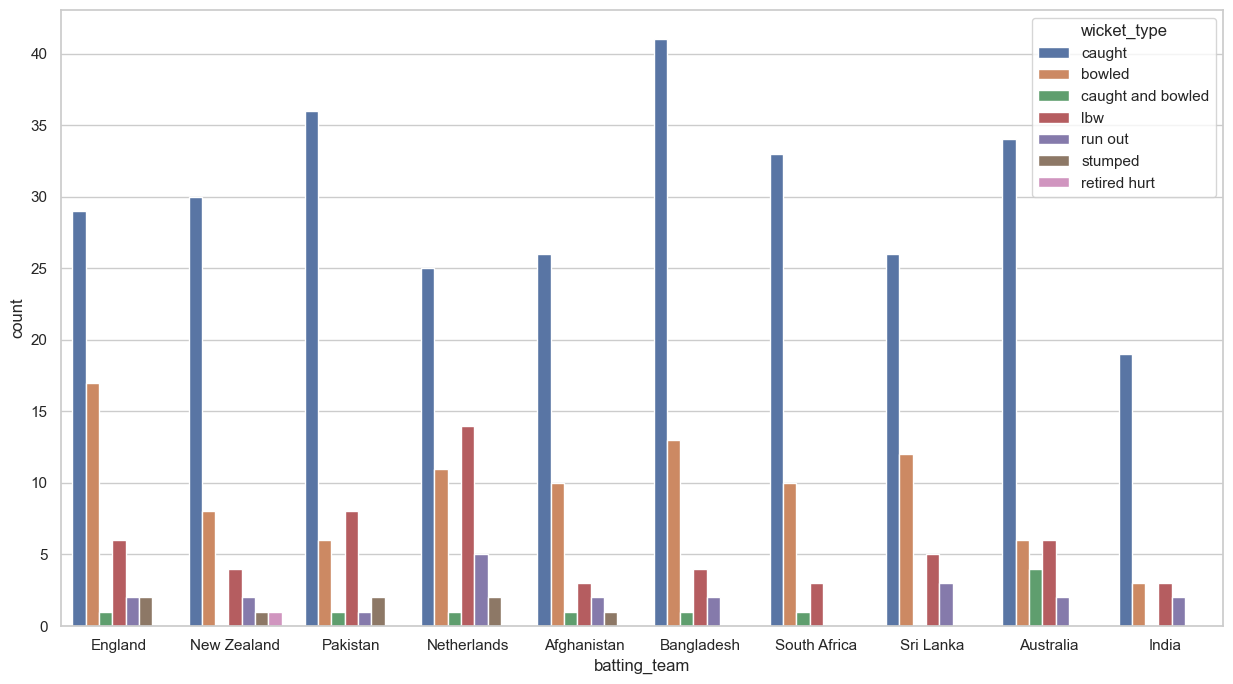

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x ='batting_team', hue = 'wicket_type', data = df)

plt.show()

In [14]:
df.isnull().sum()

match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker                   0
bowler                        0
runs_off_bat                  0
extras                        0
wides                     16949
noballs                   17338
byes                      17354
legbyes                   17263
penalty                   17379
wicket_type               16889
player_dismissed          16889
other_wicket_type         17380
other_player_dismissed    17380
dtype: int64

In [15]:
df['wicket_type'].unique()

array([nan, 'caught', 'bowled', 'caught and bowled', 'lbw', 'run out',
       'stumped', 'retired hurt'], dtype=object)

In [16]:
df.drop(['other_wicket_type','other_player_dismissed'],axis=1,inplace=True)
df.shape

(17380, 20)

In [17]:
null_cols = ['wides', 'noballs', 'byes', 'legbyes','penalty']

for col in null_cols:
    df[col] = df[col].fillna(0)

df['wicket_type'] = df['wicket_type'].fillna('no wicket')
df['player_dismissed'] = df['player_dismissed'].fillna('no wicket')

df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,0.0,0.0,0.0,0.0,0.0,no wicket,no wicket
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,0.0,0.0,0.0,0.0,0.0,no wicket,no wicket
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,0.0,0.0,0.0,0.0,0.0,no wicket,no wicket
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,0.0,0.0,0.0,0.0,0.0,no wicket,no wicket
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,0.0,0.0,0.0,0.0,0.0,no wicket,no wicket


In [ ]:
df.to_csv('ball_prediction.csv')

In [17]:
df.isnull().sum()

match_id            0
season              0
start_date          0
venue               0
innings             0
ball                0
batting_team        0
bowling_team        0
striker             0
non_striker         0
bowler              0
runs_off_bat        0
extras              0
wides               0
noballs             0
byes                0
legbyes             0
penalty             0
wicket_type         0
player_dismissed    0
dtype: int64

In [18]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,0.0,0.0,0.0,0.0,0.0,no wicket,no wicket
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,0.0,0.0,0.0,0.0,0.0,no wicket,no wicket
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,0.0,0.0,0.0,0.0,0.0,no wicket,no wicket
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,0.0,0.0,0.0,0.0,0.0,no wicket,no wicket
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,0.0,0.0,0.0,0.0,0.0,no wicket,no wicket


In [47]:
col_to_encode = ['venue','batting_team','bowling_team','striker','non_striker','bowler','wicket_type','player_dismissed']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in col_to_encode:
    df[col] = le.fit_transform(df[col])

df.head()

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed
0,7,1,0.1,3,6,52,22,86,0,0,0.0,0.0,0.0,0.0,0.0,4,135
1,7,1,0.2,3,6,52,22,86,6,0,0.0,0.0,0.0,0.0,0.0,4,135
2,7,1,0.3,3,6,52,22,86,1,0,0.0,0.0,0.0,0.0,0.0,4,135
3,7,1,0.4,3,6,23,51,86,1,0,0.0,0.0,0.0,0.0,0.0,4,135
4,7,1,0.5,3,6,52,22,86,4,0,0.0,0.0,0.0,0.0,0.0,4,135


In [21]:
df.drop(['match_id','season','start_date'],axis=1,inplace=True)
df.head()

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed
0,7,1,0.1,3,6,52,22,86,0,0,0.0,0.0,0.0,0.0,0.0,4,135
1,7,1,0.2,3,6,52,22,86,6,0,0.0,0.0,0.0,0.0,0.0,4,135
2,7,1,0.3,3,6,52,22,86,1,0,0.0,0.0,0.0,0.0,0.0,4,135
3,7,1,0.4,3,6,23,51,86,1,0,0.0,0.0,0.0,0.0,0.0,4,135
4,7,1,0.5,3,6,52,22,86,4,0,0.0,0.0,0.0,0.0,0.0,4,135


In [64]:
from sklearn.model_selection import train_test_split,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(df.drop(['runs_off_bat'], axis='columns'), df["runs_off_bat"], random_state=42, test_size=0.20, shuffle=True)
X_train.shape , X_test.shape

((13904, 16), (3476, 16))

In [51]:
from tensorflow import keras
import keras.layers as tfl
from keras.layers import BatchNormalization
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score

In [110]:
inputs=tfl.Input(shape=(16,))
x=tfl.Dense(512,activation='relu')(inputs)
x=BatchNormalization()(x)
x=tfl.Dense(256,activation='relu')(x)
x=BatchNormalization()(x)
x=tfl.Dense(128,activation='relu')(x)
x=BatchNormalization()(x)
x=tfl.Dense(64,activation='relu')(x)
x=BatchNormalization()(x)
x=tfl.Dense(32,activation='relu')(x)
x=BatchNormalization()(x)
x=tfl.Dense(16,activation='relu')(x)
x=BatchNormalization()(x)
outputs=tfl.Dense(7,activation='sigmoid')(x)
classifier_dnn=keras.Model(inputs,outputs)

classifier_dnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

classifier_dnn.fit(X_train, y_train,epochs=10)

Epoch 1/10
435/435 [==============================] - 5s 6ms/step - loss: 1.5015 - accuracy: 0.4481
Epoch 2/10
435/435 [==============================] - 3s 6ms/step - loss: 1.1416 - accuracy: 0.5279
Epoch 3/10
435/435 [==============================] - 3s 6ms/step - loss: 1.1202 - accuracy: 0.5285
Epoch 4/10
435/435 [==============================] - 2s 6ms/step - loss: 1.1106 - accuracy: 0.5300
Epoch 5/10
435/435 [==============================] - 2s 6ms/step - loss: 1.1029 - accuracy: 0.5342
Epoch 6/10
435/435 [==============================] - 2s 6ms/step - loss: 1.0951 - accuracy: 0.5297
Epoch 7/10
435/435 [==============================] - 3s 6ms/step - loss: 1.0922 - accuracy: 0.5333
Epoch 8/10
435/435 [==============================] - 3s 6ms/step - loss: 1.0894 - accuracy: 0.5301
Epoch 9/10
435/435 [==============================] - 2s 6ms/step - loss: 1.0886 - accuracy: 0.5276
Epoch 10/10
435/435 [==============================] - 3s 6ms/step - loss: 1.0874 - accuracy: 0.5314

In [49]:
from sklearn.preprocessing import StandardScaler

size_scaler = StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((13904, 16), (3476, 16))

In [48]:
model = CatBoostClassifier(iterations=100, learning_rate=0.01,loss_function='MultiClass')
model.fit(X_train_scaled,y_train,verbose=0)
y_predicted = model.predict(X_test_scaled)
val_accuracy=accuracy_score(y_test,y_predicted)
print(val_accuracy)

0.5155350978135789


In [53]:
model = lgb.LGBMClassifier(learning_rate=0.01,objective='multiclass')
model.fit(X_train_scaled,y_train)
y_predicted = model.predict(X_test_scaled)
val_accuracy=accuracy_score(y_test,y_predicted)
print(val_accuracy)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 13904, number of used features: 15
[LightGBM] [Info] Start training from score -0.631778
[LightGBM] [Info] Start training from score -1.143777
[LightGBM] [Info] Start training from score -3.203106
[LightGBM] [Info] Start training from score -5.876370
[LightGBM] [Info] Start training from score -2.477740
[LightGBM] [Info] Start training from score -8.846785
[LightGBM] [Info] Start training from score -3.806591
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0.5241657077100115


In [80]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb

In [86]:
model_results = pd.DataFrame()
model_results['Train_Recall'] = None
model_results['Test_Recall'] = None
model_results['Train_Precision'] = None
model_results['Test_Precision'] = None
model_results['Train_F1'] = None
model_results['Test_F1'] = None
model_results['Train_Accuracy'] = None
model_results['Test_Accuracy'] = None

best_class_model_ours = None
best_val_score = -1

In [87]:
classifier = LogisticRegression(solver='newton-cholesky')
classifier.fit(X_train_scaled, y_train)

y_train_predicted = classifier.predict(X_train_scaled)
train_recall = recall_score(y_train, y_train_predicted,average='micro')
train_precision = precision_score(y_train, y_train_predicted,average='micro')
train_f1 = f1_score(y_train, y_train_predicted,average='micro')
train_accuracy=accuracy_score(y_train, y_train_predicted)

print('Logistic Regression', train_precision)

y_predicted = classifier.predict(X_test_scaled)
val_recall = recall_score(y_test, y_predicted,average='micro')
val_precision = precision_score(y_test, y_predicted,average='micro')
val_f1 = f1_score(y_test, y_predicted,average='micro')
val_accuracy=accuracy_score(y_test, y_predicted)

if val_precision > best_val_score:
    best_val_score = val_precision
    best_class_model_ours = classifier

model_results.loc['Logistic Regression', ['Train_Accuracy','Test_Accuracy','Train_Recall', 'Test_Recall', 'Train_Precision', 'Test_Precision', 'Train_F1', 'Test_F1']] = [train_accuracy,val_accuracy,train_recall, val_recall, train_precision, val_precision, train_f1, val_f1]

Logistic Regression 0.5328682393555811


In [99]:
classifier = RandomForestClassifier(random_state=42, max_depth=10)
classifier.fit(X_train_scaled, y_train)

y_train_predicted = classifier.predict(X_train_scaled)
train_recall = recall_score(y_train, y_train_predicted,average='micro')
train_precision = precision_score(y_train, y_train_predicted,average='micro')
train_f1 = f1_score(y_train, y_train_predicted,average='micro')
train_accuracy=accuracy_score(y_train, y_train_predicted)

print('Random Forest Classifier', train_precision)

y_predicted = classifier.predict(X_test_scaled)
val_recall = recall_score(y_test, y_predicted,average='micro')
val_precision = precision_score(y_test, y_predicted,average='micro')
val_f1 = f1_score(y_test, y_predicted,average='micro')
val_accuracy=accuracy_score(y_test, y_predicted)

if val_precision > best_val_score:
    best_val_score = val_precision
    best_class_model_ours = classifier

model_results.loc['Random Forest Classifier', ['Train_Accuracy','Test_Accuracy','Train_Recall', 'Test_Recall', 'Train_Precision', 'Test_Precision', 'Train_F1', 'Test_F1']] = [train_accuracy,val_accuracy,train_recall, val_recall, train_precision, val_precision, train_f1, val_f1]

Random Forest Classifier 0.5893268124280783


In [89]:
classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=6)
classifier.fit(X_train_scaled, y_train)

y_train_predicted = classifier.predict(X_train_scaled)
train_recall = recall_score(y_train, y_train_predicted,average='micro')
train_precision = precision_score(y_train, y_train_predicted,average='micro')
train_f1 = f1_score(y_train, y_train_predicted,average='micro')
train_accuracy=accuracy_score(y_train, y_train_predicted)

print('XGB Classifier', train_precision)

y_predicted = classifier.predict(X_test_scaled)
val_recall = recall_score(y_test, y_predicted,average='micro')
val_precision = precision_score(y_test, y_predicted,average='micro')
val_f1 = f1_score(y_test, y_predicted,average='micro')
val_accuracy=accuracy_score(y_test, y_predicted)

if val_precision > best_val_score:
    best_val_score = val_precision
    best_class_model_ours = classifier

model_results.loc['XGB Classifier', ['Train_Accuracy','Test_Accuracy','Train_Recall', 'Test_Recall', 'Train_Precision', 'Test_Precision', 'Train_F1', 'Test_F1']] = [train_accuracy,val_accuracy,train_recall, val_recall, train_precision, val_precision, train_f1, val_f1]

XGB Classifier 0.688650747986191


In [90]:
classifier = SVC(kernel="rbf", gamma=0.5, C=1.0)
classifier.fit(X_train_scaled, y_train)

y_train_predicted = classifier.predict(X_train_scaled)
train_recall = recall_score(y_train, y_train_predicted,average='micro')
train_precision = precision_score(y_train, y_train_predicted,average='micro')
train_f1 = f1_score(y_train, y_train_predicted,average='micro')
train_accuracy=accuracy_score(y_train, y_train_predicted)

print('SVC', train_precision)

y_predicted = classifier.predict(X_test_scaled)
val_recall = recall_score(y_test, y_predicted,average='micro')
val_precision = precision_score(y_test, y_predicted,average='micro')
val_f1 = f1_score(y_test, y_predicted,average='micro')
val_accuracy=accuracy_score(y_test, y_predicted)

if val_precision > best_val_score:
    best_val_score = val_precision
    best_class_model_ours = classifier

model_results.loc['SVC', ['Train_Accuracy','Test_Accuracy','Train_Recall', 'Test_Recall', 'Train_Precision', 'Test_Precision', 'Train_F1', 'Test_F1']] = [train_accuracy,val_accuracy,train_recall, val_recall, train_precision, val_precision, train_f1, val_f1]

SVC 0.5978135788262371


In [95]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_scaled, y_train)

y_train_predicted = classifier.predict(X_train_scaled)
train_recall = recall_score(y_train, y_train_predicted,average='micro')
train_precision = precision_score(y_train, y_train_predicted,average='micro')
train_f1 = f1_score(y_train, y_train_predicted,average='micro')
train_accuracy=accuracy_score(y_train, y_train_predicted)

print('KNeighbors Classifier', train_precision)

y_predicted = classifier.predict(X_test_scaled)
val_recall = recall_score(y_test, y_predicted,average='micro')
val_precision = precision_score(y_test, y_predicted,average='micro')
val_f1 = f1_score(y_test, y_predicted,average='micro')
val_accuracy=accuracy_score(y_test, y_predicted)

if val_precision > best_val_score:
    best_val_score = val_precision
    best_class_model_ours = classifier

model_results.loc['KNeighbors Classifier', ['Train_Accuracy','Test_Accuracy','Train_Recall', 'Test_Recall', 'Train_Precision', 'Test_Precision', 'Train_F1', 'Test_F1']] = [train_accuracy,val_accuracy,train_recall, val_recall, train_precision, val_precision, train_f1, val_f1]

KNeighbors Classifier 0.6465046029919448


In [100]:
model_results

,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1,Train_Accuracy,Test_Accuracy
Logistic Regression,0.532868,0.522152,0.532868,0.522152,0.532868,0.522152,0.532868,0.522152
Random Forest Classifier,0.589327,0.528769,0.589327,0.528769,0.589327,0.528769,0.589327,0.528769
XGB Classifier,0.688651,0.514384,0.688651,0.514384,0.688651,0.514384,0.688651,0.514384
SVC,0.597814,0.520426,0.597814,0.520426,0.597814,0.520426,0.597814,0.520426
KNeighbors Classifier,0.646505,0.510644,0.646505,0.510644,0.646505,0.510644,0.646505,0.510644


In [108]:
y_pred=best_class_model_ours.predict(X_test_scaled)
print('Best Model is '+str(best_class_model_ours))

Best Model is RandomForestClassifier(max_depth=10, random_state=42)


In [ ]:
import pickle
pickle_rfc = open("ball_prediction_rfc.pkl","wb")
pickle.dump(best_class_model_ours, pickle_rfc)
pickle_rfc.close()